In [143]:
import pickle
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import scanpy as sc
import anndata as ad
import os
import itertools

In [2]:
#pyscenic_pipeline_folder = '../../pyscenic_data/pyscenic_pipeline'
#pyscenic_pipeline_folder = 'D:/Robin/pyscenic'

single_seq_folder = "../../OB_single_seq_data/"

#regulons_fname = os.path.join(pyscenic_pipeline_folder,'regulons_nuc.p') #shouldn't actually need regulons because I can just get columns names from matrices 
binarized_fname = os.path.join(single_seq_folder,'R1_R3_pyscenic_binarized.p')
auc_fname = os.path.join(single_seq_folder,'R1_R3_auc.p')

In [6]:
auc = pd.read_pickle(auc_fname)
binarized = pd.read_pickle(binarized_fname)

###  set up matrices I'm interested in

In [52]:
#all working from binarized
both_0 = pd.DataFrame(0,index=binarized.columns,columns=binarized.columns)
both_1 = pd.DataFrame(0,index=binarized.columns,columns=binarized.columns)
same = pd.DataFrame(0,index=binarized.columns,columns=binarized.columns)
A0B1 = pd.DataFrame(0,index=binarized.columns,columns=binarized.columns)
A1B0 = pd.DataFrame(0,index=binarized.columns,columns=binarized.columns)
diff = pd.DataFrame(0,index=binarized.columns,columns=binarized.columns)

### actually iterating, filling matrices

In [48]:
#let's do two steps. First, set up a funciton that will categorize the values. Then, we'll apply it row by row.
#Then, I'll count how many of each category there are and fill in the cells of the ultimate matrices appropriately
def categorize(a,b):
    if a == 0 and b == 0:
        return 'both_0'
    elif a == 1 and b == 1:
        return 'both_1'
    elif a == 0 and b == 1:
        return 'A0B1'
    else:
        return 'A1B0'

In [89]:
for (a,b) in itertools.permutations(list(binarized.columns), 2): #how to iterate
#for (a,b) in pairs[1:10]: #testing on smaller dataset
    categorized_series = binarized.apply(lambda x: categorize(x[a],x[b]),axis=1)
    both_0.loc[a,b] = len(categorized_series[categorized_series == 'both_0'].index) / float(len(binarized.index))
    both_1.loc[a,b] = len(categorized_series[categorized_series == 'both_1'].index) / float(len(binarized.index))
    A0B1.loc[a,b] = len(categorized_series[categorized_series == 'A0B1'].index) / float(len(binarized.index))
    A1B0.loc[a,b] = len(categorized_series[categorized_series == 'A1B0'].index) / float(len(binarized.index))
    #print(categorized_series)

In [90]:
A1B0

Regulon     Alx3(+)  Arid5b(+)   Arnt(+)   Atf2(+)   Atf4(+)  Bach2(+)  \
Regulon                                                                  
Alx3(+)    0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
Arid5b(+)  0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   
Arnt(+)    0.103986   0.103986  0.000000  0.100087  0.095321  0.099653   
Atf2(+)    0.029896   0.029896  0.025997  0.000000  0.029029  0.027730   
Atf4(+)    0.040728   0.040728  0.032062  0.039861  0.000000  0.040295   
...             ...        ...       ...       ...       ...       ...   
Zfp143(+)  0.045927   0.045927  0.038128  0.044627  0.036395  0.042461   
Zfp398(+)  0.121317   0.121317  0.104853  0.117418  0.116118  0.114385   
Zfp467(+)  0.060225   0.060225  0.053293  0.057626  0.056326  0.058925   
Zfp523(+)  0.034662   0.034662  0.028163  0.032062  0.032496  0.033795   
Zic1(+)    0.000000   0.000000  0.000000  0.000000  0.000000  0.000000   

Regulon    Barx1(+)  Bcl11a(+)  Bclaf1(+)   Bmyc(+)  ...   Usf1(+)   Usf2(+)  \
Regulon                                              ...                       
Alx3(+)    0.000000   0.000000   0.000000  0.000000  ...  0.000000  0.000000   
Arid5b(+)  0.000000   0.000000   0.000000  0.000000  ...  0.000000  0.000000   
Arnt(+)    0.094454   0.103553   0.096187  0.097054  ...  0.095321  0.084922   
Atf2(+)    0.028163   0.029463   0.027730  0.029896  ...  0.028596  0.026430   
Atf4(+)    0.038995   0.040728   0.028596  0.016031  ...  0.016464  0.024263   
...             ...        ...        ...       ...  ...       ...       ...   
Zfp143(+)  0.041161   0.045927   0.034229  0.035095  ...  0.035095  0.029896   
Zfp398(+)  0.100520   0.120017   0.118284  0.114818  ...  0.113951  0.100953   
Zfp467(+)  0.054593   0.060225   0.053726  0.054593  ...  0.052426  0.045061   
Zfp523(+)  0.033362   0.034662   0.029029  0.030329  ...  0.032062  0.026430   
Zic1(+)    0.000000   0.000000   0.000000  0.000000  ...  0.000000  0.000000   

Regulon     Vax1(+)    Yy1(+)  Zfp110(+)  Zfp143(+)  Zfp398(+)  Zfp467(+)  \
Regulon                                                                     
Alx3(+)    0.000000  0.000000   0.000000   0.000000   0.000000   0.000000   
Arid5b(+)  0.000000  0.000000   0.000000   0.000000   0.000000   0.000000   
Arnt(+)    0.079289  0.096187   0.094887   0.096187   0.087522   0.097054   
Atf2(+)    0.021664  0.028596   0.028596   0.028596   0.025997   0.027296   
Atf4(+)    0.019497  0.021231   0.032496   0.031196   0.035529   0.036828   
...             ...       ...        ...        ...        ...        ...   
Zfp143(+)  0.032062  0.034229   0.037695   0.000000   0.038562   0.042894   
Zfp398(+)  0.101820  0.115685   0.117418   0.113951   0.000000   0.115251   
Zfp467(+)  0.039861  0.054593   0.057192   0.057192   0.054159   0.000000   
Zfp523(+)  0.023830  0.030763   0.031196   0.032929   0.032496   0.029896   
Zic1(+)    0.000000  0.000000   0.000000   0.000000   0.000000   0.000000   

Regulon    Zfp523(+)   Zic1(+)  
Regulon                         
Alx3(+)     0.000000  0.000000  
Arid5b(+)   0.000000  0.000000  
Arnt(+)     0.097487  0.103986  
Atf2(+)     0.027296  0.029896  
Atf4(+)     0.038562  0.040728  
...              ...       ...  
Zfp143(+)   0.044194  0.045927  
Zfp398(+)   0.119151  0.121317  
Zfp467(+)   0.055459  0.060225  
Zfp523(+)   0.000000  0.034662  
Zic1(+)     0.000000  0.000000  

[125 rows x 125 columns]

In [91]:
both_1

Regulon    Alx3(+)  Arid5b(+)   Arnt(+)   Atf2(+)   Atf4(+)  Bach2(+)  \
Regulon                                                                 
Alx3(+)        0.0        0.0  0.000000  0.000000  0.000000  0.000000   
Arid5b(+)      0.0        0.0  0.000000  0.000000  0.000000  0.000000   
Arnt(+)        0.0        0.0  0.000000  0.003899  0.008666  0.004333   
Atf2(+)        0.0        0.0  0.003899  0.000000  0.000867  0.002166   
Atf4(+)        0.0        0.0  0.008666  0.000867  0.000000  0.000433   
...            ...        ...       ...       ...       ...       ...   
Zfp143(+)      0.0        0.0  0.007799  0.001300  0.009532  0.003466   
Zfp398(+)      0.0        0.0  0.016464  0.003899  0.005199  0.006932   
Zfp467(+)      0.0        0.0  0.006932  0.002600  0.003899  0.001300   
Zfp523(+)      0.0        0.0  0.006499  0.002600  0.002166  0.000867   
Zic1(+)        0.0        0.0  0.000000  0.000000  0.000000  0.000000   

Regulon    Barx1(+)  Bcl11a(+)  Bclaf1(+)   Bmyc(+)  ...   Usf1(+)   Usf2(+)  \
Regulon                                              ...                       
Alx3(+)    0.000000   0.000000   0.000000  0.000000  ...  0.000000  0.000000   
Arid5b(+)  0.000000   0.000000   0.000000  0.000000  ...  0.000000  0.000000   
Arnt(+)    0.009532   0.000433   0.007799  0.006932  ...  0.008666  0.019064   
Atf2(+)    0.001733   0.000433   0.002166  0.000000  ...  0.001300  0.003466   
Atf4(+)    0.001733   0.000000   0.012132  0.024697  ...  0.024263  0.016464   
...             ...        ...        ...       ...  ...       ...       ...   
Zfp143(+)  0.004766   0.000000   0.011698  0.010832  ...  0.010832  0.016031   
Zfp398(+)  0.020797   0.001300   0.003033  0.006499  ...  0.007366  0.020364   
Zfp467(+)  0.005633   0.000000   0.006499  0.005633  ...  0.007799  0.015165   
Zfp523(+)  0.001300   0.000000   0.005633  0.004333  ...  0.002600  0.008232   
Zic1(+)    0.000000   0.000000   0.000000  0.000000  ...  0.000000  0.000000   

Regulon     Vax1(+)    Yy1(+)  Zfp110(+)  Zfp143(+)  Zfp398(+)  Zfp467(+)  \
Regulon                                                                     
Alx3(+)    0.000000  0.000000   0.000000   0.000000   0.000000   0.000000   
Arid5b(+)  0.000000  0.000000   0.000000   0.000000   0.000000   0.000000   
Arnt(+)    0.024697  0.007799   0.009099   0.007799   0.016464   0.006932   
Atf2(+)    0.008232  0.001300   0.001300   0.001300   0.003899   0.002600   
Atf4(+)    0.021231  0.019497   0.008232   0.009532   0.005199   0.003899   
...             ...       ...        ...        ...        ...        ...   
Zfp143(+)  0.013865  0.011698   0.008232   0.000000   0.007366   0.003033   
Zfp398(+)  0.019497  0.005633   0.003899   0.007366   0.000000   0.006066   
Zfp467(+)  0.020364  0.005633   0.003033   0.003033   0.006066   0.000000   
Zfp523(+)  0.010832  0.003899   0.003466   0.001733   0.002166   0.004766   
Zic1(+)    0.000000  0.000000   0.000000   0.000000   0.000000   0.000000   

Regulon    Zfp523(+)  Zic1(+)  
Regulon                        
Alx3(+)     0.000000      0.0  
Arid5b(+)   0.000000      0.0  
Arnt(+)     0.006499      0.0  
Atf2(+)     0.002600      0.0  
Atf4(+)     0.002166      0.0  
...              ...      ...  
Zfp143(+)   0.001733      0.0  
Zfp398(+)   0.002166      0.0  
Zfp467(+)   0.004766      0.0  
Zfp523(+)   0.000000      0.0  
Zic1(+)     0.000000      0.0  

[125 rows x 125 columns]

In [92]:
both_0

Regulon     Alx3(+)  Arid5b(+)   Arnt(+)   Atf2(+)   Atf4(+)  Bach2(+)  \
Regulon                                                                  
Alx3(+)    0.000000   1.000000  0.896014  0.970104  0.959272  0.964038   
Arid5b(+)  1.000000   0.000000  0.896014  0.970104  0.959272  0.964038   
Arnt(+)    0.896014   0.896014  0.000000  0.870017  0.863951  0.864385   
Atf2(+)    0.970104   0.970104  0.870017  0.000000  0.930243  0.936308   
Atf4(+)    0.959272   0.959272  0.863951  0.930243  0.000000  0.923744   
...             ...        ...       ...       ...       ...       ...   
Zfp143(+)  0.954073   0.954073  0.857886  0.925477  0.922877  0.921577   
Zfp398(+)  0.878683   0.878683  0.791161  0.852686  0.843154  0.849653   
Zfp467(+)  0.939775   0.939775  0.842721  0.912478  0.902946  0.905113   
Zfp523(+)  0.965338   0.965338  0.867851  0.938042  0.926776  0.930243   
Zic1(+)    1.000000   1.000000  0.896014  0.970104  0.959272  0.964038   

Regulon    Barx1(+)  Bcl11a(+)  Bclaf1(+)   Bmyc(+)  ...   Usf1(+)   Usf2(+)  \
Regulon                                              ...                       
Alx3(+)    0.879549   0.987868   0.951473  0.951906  ...  0.950607  0.856586   
Arid5b(+)  0.879549   0.987868   0.951473  0.951906  ...  0.950607  0.856586   
Arnt(+)    0.785095   0.884315   0.855286  0.854853  ...  0.855286  0.771664   
Atf2(+)    0.851386   0.958406   0.923744  0.922010  ...  0.922010  0.830156   
Atf4(+)    0.840555   0.947140   0.922877  0.935875  ...  0.934142  0.832322   
...             ...        ...        ...       ...  ...       ...       ...   
Zfp143(+)  0.838388   0.941941   0.917244  0.916811  ...  0.915511  0.826690   
Zfp398(+)  0.779029   0.867851   0.833189  0.837088  ...  0.836655  0.755633   
Zfp467(+)  0.824957   0.927643   0.897747  0.897314  ...  0.898180  0.811525   
Zfp523(+)  0.846187   0.953206   0.922444  0.921577  ...  0.918544  0.830156   
Zic1(+)    0.879549   0.987868   0.951473  0.951906  ...  0.950607  0.856586   

Regulon     Vax1(+)    Yy1(+)  Zfp110(+)  Zfp143(+)  Zfp398(+)  Zfp467(+)  \
Regulon                                                                     
Alx3(+)    0.808925  0.955373   0.954939   0.954073   0.878683   0.939775   
Arid5b(+)  0.808925  0.955373   0.954939   0.954073   0.878683   0.939775   
Arnt(+)    0.729636  0.859185   0.860052   0.857886   0.791161   0.842721   
Atf2(+)    0.787262  0.926776   0.926343   0.925477   0.852686   0.912478   
Atf4(+)    0.789428  0.934142   0.922444   0.922877   0.843154   0.902946   
...             ...       ...        ...        ...        ...        ...   
Zfp143(+)  0.776863  0.921144   0.917244   0.000000   0.840121   0.896880   
Zfp398(+)  0.707106  0.839688   0.837522   0.840121   0.000000   0.824523   
Zfp467(+)  0.769064  0.900780   0.897747   0.896880   0.824523   0.000000   
Zfp523(+)  0.785095  0.924610   0.923744   0.921144   0.846187   0.909879   
Zic1(+)    0.808925  0.955373   0.954939   0.954073   0.878683   0.939775   

Regulon    Zfp523(+)   Zic1(+)  
Regulon                         
Alx3(+)     0.965338  1.000000  
Arid5b(+)   0.965338  1.000000  
Arnt(+)     0.867851  0.896014  
Atf2(+)     0.938042  0.970104  
Atf4(+)     0.926776  0.959272  
...              ...       ...  
Zfp143(+)   0.921144  0.954073  
Zfp398(+)   0.846187  0.878683  
Zfp467(+)   0.909879  0.939775  
Zfp523(+)   0.000000  0.965338  
Zic1(+)     0.965338  0.000000  

[125 rows x 125 columns]

### Looking at percentage only when A is 1

In [93]:
A1 = both_1 + A1B0

In [115]:
both1_adjusted = both_1/A1
A1B0_adjusted = A1B0/A1

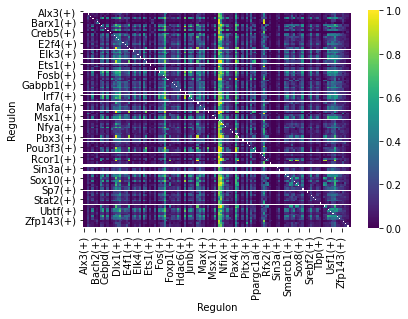

In [95]:
sns.heatmap(both1_adjusted,cmap='viridis')

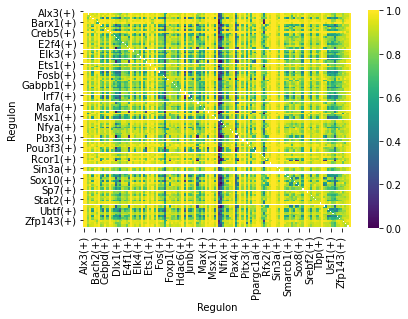

In [96]:
sns.heatmap(A1B0_adjusted,cmap='viridis')

## Analysis

#### resticting to only regulons expressed in at least 10 cells

In [120]:
for A in both1_adjusted.columns:
    if len(binarized[(binarized[A] == 1)]) < 10:
        both1_adjusted[A]= float("NaN")

In [125]:
for (A,B) in itertools.permutations(list(binarized.columns), 2):
    if len(binarized[(binarized[A] == 1)]) < 10 or len(binarized[(binarized[B] == 1)]) < 10:
        A1B0_adjusted.loc[A,B]= float("NaN")

In [118]:
both1_adjusted

Regulon    Alx3(+)  Arid5b(+)   Arnt(+)   Atf2(+)   Atf4(+)  Bach2(+)  \
Regulon                                                                 
Alx3(+)        NaN        NaN       NaN       NaN       NaN       NaN   
Arid5b(+)      NaN        NaN       NaN       NaN       NaN       NaN   
Arnt(+)        NaN        NaN       NaN  0.037500  0.083333  0.041667   
Atf2(+)        NaN        NaN  0.130435       NaN  0.028986  0.072464   
Atf4(+)        NaN        NaN  0.212766  0.021277       NaN  0.010638   
...            ...        ...       ...       ...       ...       ...   
Zfp143(+)      NaN        NaN  0.169811  0.028302  0.207547  0.075472   
Zfp398(+)      NaN        NaN  0.135714  0.032143  0.042857  0.057143   
Zfp467(+)      NaN        NaN  0.115108  0.043165  0.064748  0.021583   
Zfp523(+)      NaN        NaN  0.187500  0.075000  0.062500  0.025000   
Zic1(+)        NaN        NaN       NaN       NaN       NaN       NaN   

Regulon    Barx1(+)  Bcl11a(+)  Bclaf1(+)   Bmyc(+)  ...   Usf1(+)   Usf2(+)  \
Regulon                                              ...                       
Alx3(+)         NaN        NaN        NaN       NaN  ...       NaN       NaN   
Arid5b(+)       NaN        NaN        NaN       NaN  ...       NaN       NaN   
Arnt(+)    0.091667   0.004167   0.075000  0.066667  ...  0.083333  0.183333   
Atf2(+)    0.057971   0.014493   0.072464  0.000000  ...  0.043478  0.115942   
Atf4(+)    0.042553   0.000000   0.297872  0.606383  ...  0.595745  0.404255   
...             ...        ...        ...       ...  ...       ...       ...   
Zfp143(+)  0.103774   0.000000   0.254717  0.235849  ...  0.235849  0.349057   
Zfp398(+)  0.171429   0.010714   0.025000  0.053571  ...  0.060714  0.167857   
Zfp467(+)  0.093525   0.000000   0.107914  0.093525  ...  0.129496  0.251799   
Zfp523(+)  0.037500   0.000000   0.162500  0.125000  ...  0.075000  0.237500   
Zic1(+)         NaN        NaN        NaN       NaN  ...       NaN       NaN   

Regulon     Vax1(+)    Yy1(+)  Zfp110(+)  Zfp143(+)  Zfp398(+)  Zfp467(+)  \
Regulon                                                                     
Alx3(+)         NaN       NaN        NaN        NaN        NaN        NaN   
Arid5b(+)       NaN       NaN        NaN        NaN        NaN        NaN   
Arnt(+)    0.237500  0.075000   0.087500   0.075000   0.158333   0.066667   
Atf2(+)    0.275362  0.043478   0.043478   0.043478   0.130435   0.086957   
Atf4(+)    0.521277  0.478723   0.202128   0.234043   0.127660   0.095745   
...             ...       ...        ...        ...        ...        ...   
Zfp143(+)  0.301887  0.254717   0.179245        NaN   0.160377   0.066038   
Zfp398(+)  0.160714  0.046429   0.032143   0.060714        NaN   0.050000   
Zfp467(+)  0.338129  0.093525   0.050360   0.050360   0.100719        NaN   
Zfp523(+)  0.312500  0.112500   0.100000   0.050000   0.062500   0.137500   
Zic1(+)         NaN       NaN        NaN        NaN        NaN        NaN   

Regulon    Zfp523(+)  Zic1(+)  
Regulon                        
Alx3(+)          NaN      NaN  
Arid5b(+)        NaN      NaN  
Arnt(+)     0.062500      NaN  
Atf2(+)     0.086957      NaN  
Atf4(+)     0.053191      NaN  
...              ...      ...  
Zfp143(+)   0.037736      NaN  
Zfp398(+)   0.017857      NaN  
Zfp467(+)   0.079137      NaN  
Zfp523(+)        NaN      NaN  
Zic1(+)          NaN      NaN  

[125 rows x 125 columns]

In [126]:
A1B0_adjusted

Regulon    Alx3(+)  Arid5b(+)   Arnt(+)   Atf2(+)   Atf4(+)  Bach2(+)  \
Regulon                                                                 
Alx3(+)        NaN        NaN       NaN       NaN       NaN       NaN   
Arid5b(+)      NaN        NaN       NaN       NaN       NaN       NaN   
Arnt(+)        NaN        NaN       NaN  0.962500  0.916667  0.958333   
Atf2(+)        NaN        NaN  0.869565       NaN  0.971014  0.927536   
Atf4(+)        NaN        NaN  0.787234  0.978723       NaN  0.989362   
...            ...        ...       ...       ...       ...       ...   
Zfp143(+)      NaN        NaN  0.830189  0.971698  0.792453  0.924528   
Zfp398(+)      NaN        NaN  0.864286  0.967857  0.957143  0.942857   
Zfp467(+)      NaN        NaN  0.884892  0.956835  0.935252  0.978417   
Zfp523(+)      NaN        NaN  0.812500  0.925000  0.937500  0.975000   
Zic1(+)        NaN        NaN       NaN       NaN       NaN       NaN   

Regulon    Barx1(+)  Bcl11a(+)  Bclaf1(+)   Bmyc(+)  ...   Usf1(+)   Usf2(+)  \
Regulon                                              ...                       
Alx3(+)         NaN        NaN        NaN       NaN  ...       NaN       NaN   
Arid5b(+)       NaN        NaN        NaN       NaN  ...       NaN       NaN   
Arnt(+)    0.908333   0.995833   0.925000  0.933333  ...  0.916667  0.816667   
Atf2(+)    0.942029   0.985507   0.927536  1.000000  ...  0.956522  0.884058   
Atf4(+)    0.957447   1.000000   0.702128  0.393617  ...  0.404255  0.595745   
...             ...        ...        ...       ...  ...       ...       ...   
Zfp143(+)  0.896226   1.000000   0.745283  0.764151  ...  0.764151  0.650943   
Zfp398(+)  0.828571   0.989286   0.975000  0.946429  ...  0.939286  0.832143   
Zfp467(+)  0.906475   1.000000   0.892086  0.906475  ...  0.870504  0.748201   
Zfp523(+)  0.962500   1.000000   0.837500  0.875000  ...  0.925000  0.762500   
Zic1(+)         NaN        NaN        NaN       NaN  ...       NaN       NaN   

Regulon     Vax1(+)    Yy1(+)  Zfp110(+)  Zfp143(+)  Zfp398(+)  Zfp467(+)  \
Regulon                                                                     
Alx3(+)         NaN       NaN        NaN        NaN        NaN        NaN   
Arid5b(+)       NaN       NaN        NaN        NaN        NaN        NaN   
Arnt(+)    0.762500  0.925000   0.912500   0.925000   0.841667   0.933333   
Atf2(+)    0.724638  0.956522   0.956522   0.956522   0.869565   0.913043   
Atf4(+)    0.478723  0.521277   0.797872   0.765957   0.872340   0.904255   
...             ...       ...        ...        ...        ...        ...   
Zfp143(+)  0.698113  0.745283   0.820755        NaN   0.839623   0.933962   
Zfp398(+)  0.839286  0.953571   0.967857   0.939286        NaN   0.950000   
Zfp467(+)  0.661871  0.906475   0.949640   0.949640   0.899281        NaN   
Zfp523(+)  0.687500  0.887500   0.900000   0.950000   0.937500   0.862500   
Zic1(+)         NaN       NaN        NaN        NaN        NaN        NaN   

Regulon    Zfp523(+)  Zic1(+)  
Regulon                        
Alx3(+)          NaN      NaN  
Arid5b(+)        NaN      NaN  
Arnt(+)     0.937500      NaN  
Atf2(+)     0.913043      NaN  
Atf4(+)     0.946809      NaN  
...              ...      ...  
Zfp143(+)   0.962264      NaN  
Zfp398(+)   0.982143      NaN  
Zfp467(+)   0.920863      NaN  
Zfp523(+)        NaN      NaN  
Zic1(+)          NaN      NaN  

[125 rows x 125 columns]

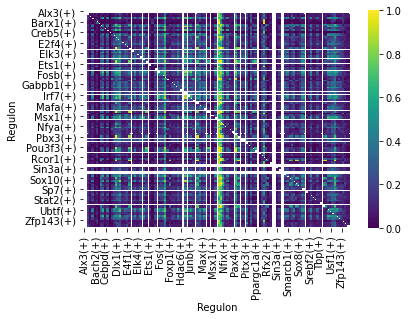

In [121]:
sns.heatmap(both1_adjusted,cmap='viridis')

#### print top 20 co-expressers


In [97]:
top_co = both1_adjusted.stack().nlargest(30).index.tolist()
for (a,b) in top_co:
    print(a,b,'co-expression level: ',both1_adjusted.loc[a,b])

Bcl11a(+) Myf5(+) co-expression level:  1.0
Egr1(+) Nfib(+) co-expression level:  1.0
Mef2c(+) Nfib(+) co-expression level:  1.0
Mitf(+) Myf5(+) co-expression level:  1.0
Mitf(+) Rcor1(+) co-expression level:  1.0
Pbx3(+) Nfib(+) co-expression level:  1.0
Rfx3(+) Maf(+) co-expression level:  1.0
Rfx3(+) Nfib(+) co-expression level:  1.0
Sox6(+) Nfib(+) co-expression level:  0.9827586206896551
Rfx2(+) Nfib(+) co-expression level:  0.9824561403508772
Ppargc1a(+) Myf5(+) co-expression level:  0.9821428571428571
Esrrg(+) Nfib(+) co-expression level:  0.9803921568627451
Tcf7l2(+) Nfib(+) co-expression level:  0.978021978021978
Etv6(+) Myf5(+) co-expression level:  0.9777777777777777
Foxo1(+) Myf5(+) co-expression level:  0.975
Pparg(+) Nfib(+) co-expression level:  0.972972972972973
Egr1(+) Dlx1(+) co-expression level:  0.9722222222222222
Rcor1(+) Myf5(+) co-expression level:  0.9721448467966575
Pbx3(+) Dlx1(+) co-expression level:  0.9712230215827338
Tead1(+) Nfib(+) co-expression level:  

In [104]:
top_re = A1B0_adjusted.stack().nlargest(10).index.tolist()
for (a,b) in top_re:
    print(a,b,'repression level: ',A1B0_adjusted.loc[a,b])

Arnt(+) Alx3(+) repression level:  1.0
Arnt(+) Arid5b(+) repression level:  1.0
Arnt(+) Creb5(+) repression level:  1.0
Arnt(+) Elf4(+) repression level:  1.0
Arnt(+) Erf(+) repression level:  1.0
Arnt(+) Ets1(+) repression level:  1.0
Arnt(+) Fli1(+) repression level:  1.0
Arnt(+) Hivep1(+) repression level:  1.0
Arnt(+) Irf7(+) repression level:  1.0
Arnt(+) Lef1(+) repression level:  1.0


### Make and save dictionaries of co-expressors (>0.9 in both1) or repressors (1 in A1B0)

In [127]:
coexpress = {}
repress_new = {}

In [128]:
#for (a,b) in itertools.permutations(list(binarized.columns), 2): #how to iterate
#actually iterating row by row
for index, row in both1_adjusted.iterrows():
    coexpress[index] = []
    #repress[index] = []
    #if both1_adjusted.loc[a,b] > 0.9:
    coexpress[index] = [x for x in row.index if row[x] > 0.9]

In [124]:
A1B0_adjusted

Regulon    Alx3(+)  Arid5b(+)   Arnt(+)   Atf2(+)   Atf4(+)  Bach2(+)  \
Regulon                                                                 
Alx3(+)        NaN        NaN       NaN       NaN       NaN       NaN   
Arid5b(+)      NaN        NaN       NaN       NaN       NaN       NaN   
Arnt(+)        NaN        NaN       NaN  0.962500  0.916667  0.958333   
Atf2(+)        NaN        NaN  0.869565       NaN  0.971014  0.927536   
Atf4(+)        NaN        NaN  0.787234  0.978723       NaN  0.989362   
...            ...        ...       ...       ...       ...       ...   
Zfp143(+)      NaN        NaN  0.830189  0.971698  0.792453  0.924528   
Zfp398(+)      NaN        NaN  0.864286  0.967857  0.957143  0.942857   
Zfp467(+)      NaN        NaN  0.884892  0.956835  0.935252  0.978417   
Zfp523(+)      NaN        NaN  0.812500  0.925000  0.937500  0.975000   
Zic1(+)        NaN        NaN       NaN       NaN       NaN       NaN   

Regulon    Barx1(+)  Bcl11a(+)  Bclaf1(+)   Bmyc(+)  ...   Usf1(+)   Usf2(+)  \
Regulon                                              ...                       
Alx3(+)         NaN        NaN        NaN       NaN  ...       NaN       NaN   
Arid5b(+)       NaN        NaN        NaN       NaN  ...       NaN       NaN   
Arnt(+)    0.908333   0.995833   0.925000  0.933333  ...  0.916667  0.816667   
Atf2(+)    0.942029   0.985507   0.927536  1.000000  ...  0.956522  0.884058   
Atf4(+)    0.957447   1.000000   0.702128  0.393617  ...  0.404255  0.595745   
...             ...        ...        ...       ...  ...       ...       ...   
Zfp143(+)  0.896226   1.000000   0.745283  0.764151  ...  0.764151  0.650943   
Zfp398(+)  0.828571   0.989286   0.975000  0.946429  ...  0.939286  0.832143   
Zfp467(+)  0.906475   1.000000   0.892086  0.906475  ...  0.870504  0.748201   
Zfp523(+)  0.962500   1.000000   0.837500  0.875000  ...  0.925000  0.762500   
Zic1(+)         NaN        NaN        NaN       NaN  ...       NaN       NaN   

Regulon     Vax1(+)    Yy1(+)  Zfp110(+)  Zfp143(+)  Zfp398(+)  Zfp467(+)  \
Regulon                                                                     
Alx3(+)         NaN       NaN        NaN        NaN        NaN        NaN   
Arid5b(+)       NaN       NaN        NaN        NaN        NaN        NaN   
Arnt(+)    0.762500  0.925000   0.912500   0.925000   0.841667   0.933333   
Atf2(+)    0.724638  0.956522   0.956522   0.956522   0.869565   0.913043   
Atf4(+)    0.478723  0.521277   0.797872   0.765957   0.872340   0.904255   
...             ...       ...        ...        ...        ...        ...   
Zfp143(+)  0.698113  0.745283   0.820755        NaN   0.839623   0.933962   
Zfp398(+)  0.839286  0.953571   0.967857   0.939286        NaN   0.950000   
Zfp467(+)  0.661871  0.906475   0.949640   0.949640   0.899281        NaN   
Zfp523(+)  0.687500  0.887500   0.900000   0.950000   0.937500   0.862500   
Zic1(+)         NaN       NaN        NaN        NaN        NaN        NaN   

Regulon    Zfp523(+)  Zic1(+)  
Regulon                        
Alx3(+)          NaN      NaN  
Arid5b(+)        NaN      NaN  
Arnt(+)     0.937500      NaN  
Atf2(+)     0.913043      NaN  
Atf4(+)     0.946809      NaN  
...              ...      ...  
Zfp143(+)   0.962264      NaN  
Zfp398(+)   0.982143      NaN  
Zfp467(+)   0.920863      NaN  
Zfp523(+)        NaN      NaN  
Zic1(+)          NaN      NaN  

[125 rows x 125 columns]

In [129]:
for index, row in A1B0_adjusted.iterrows():
    #repress[index] = []
    #repress[index] = []
    #if both1_adjusted.loc[a,b] > 0.9:
    repress_new[index] = [x for x in row.index if row[x] == 1.0]

In [131]:
if repress is not repress_new:
    print('diff')

diff


In [132]:
coexpress

{'Alx3(+)': [],
 'Arid5b(+)': [],
 'Arnt(+)': [],
 'Atf2(+)': [],
 'Atf4(+)': [],
 'Bach2(+)': ['Myf5(+)'],
 'Barx1(+)': ['Myf5(+)', 'Rcor1(+)'],
 'Bcl11a(+)': ['Myf5(+)', 'Rcor1(+)'],
 'Bclaf1(+)': ['Nfib(+)'],
 'Bmyc(+)': ['Hmgb3(+)'],
 'Cebpd(+)': [],
 'Creb3(+)': [],
 'Creb5(+)': ['Myf5(+)'],
 'Crem(+)': [],
 'Ctcf(+)': [],
 'Dlx1(+)': ['Nfib(+)'],
 'Dlx2(+)': [],
 'E2f2(+)': [],
 'E2f4(+)': [],
 'E2f6(+)': [],
 'E4f1(+)': [],
 'Egr1(+)': ['Dlx1(+)', 'Nfib(+)'],
 'Elf4(+)': [],
 'Elk1(+)': [],
 'Elk3(+)': [],
 'Elk4(+)': [],
 'Ep300(+)': [],
 'Erf(+)': [],
 'Esrra(+)': [],
 'Esrrg(+)': ['Myf5(+)', 'Nfib(+)'],
 'Ets1(+)': [],
 'Etv3(+)': [],
 'Etv6(+)': ['Myf5(+)', 'Rcor1(+)'],
 'Ezh2(+)': [],
 'Fli1(+)': [],
 'Fos(+)': [],
 'Fosb(+)': [],
 'Fosl1(+)': [],
 'Foxd3(+)': [],
 'Foxo1(+)': ['Myf5(+)', 'Nfib(+)', 'Pax6(+)'],
 'Foxp1(+)': [],
 'Gabpa(+)': [],
 'Gabpb1(+)': [],
 'Hcfc1(+)': [],
 'Hdac2(+)': [],
 'Hdac6(+)': [],
 'Hivep1(+)': [],
 'Hmgb3(+)': [],
 'Irf7(+)': [],
 'Jun(+)': 

In [135]:
repress_new

{'Alx3(+)': [],
 'Arid5b(+)': [],
 'Arnt(+)': ['Creb5(+)'],
 'Atf2(+)': ['Bmyc(+)', 'Creb5(+)', 'Msx1(+)', 'Rfx3(+)', 'Sox8(+)'],
 'Atf4(+)': ['Bcl11a(+)', 'Creb5(+)', 'Pou2f1(+)', 'Rarb(+)'],
 'Bach2(+)': ['Bmyc(+)',
  'Cebpd(+)',
  'Ctcf(+)',
  'Elk1(+)',
  'Jun(+)',
  'Pparg(+)',
  'Rfx2(+)',
  'Sirt6(+)',
  'Smarcb1(+)',
  'Sox4(+)'],
 'Barx1(+)': ['Creb5(+)'],
 'Bcl11a(+)': ['Atf4(+)',
  'Bclaf1(+)',
  'Bmyc(+)',
  'Cebpd(+)',
  'Creb5(+)',
  'Ctcf(+)',
  'E2f4(+)',
  'E2f6(+)',
  'Elk1(+)',
  'Elk3(+)',
  'Elk4(+)',
  'Ep300(+)',
  'Esrra(+)',
  'Etv3(+)',
  'Ezh2(+)',
  'Foxo1(+)',
  'Foxp1(+)',
  'Gabpa(+)',
  'Gabpb1(+)',
  'Hcfc1(+)',
  'Hdac2(+)',
  'Jun(+)',
  'Klf5(+)',
  'Mafa(+)',
  'Msx1(+)',
  'Mxi1(+)',
  'Nr2c2(+)',
  'Phf8(+)',
  'Pou2f1(+)',
  'Rax(+)',
  'Rfx2(+)',
  'Rfx3(+)',
  'Sirt6(+)',
  'Smarca4(+)',
  'Smarcb1(+)',
  'Sox10(+)',
  'Sox4(+)',
  'Sox6(+)',
  'Sox8(+)',
  'Sp4(+)',
  'Srebf1(+)',
  'Srf(+)',
  'Stat1(+)',
  'Stat2(+)',
  'Taf7(+)',
  'Tbp(+)'

In [137]:
c = open("coexpress.p","wb")
pickle.dump(coexpress,c)
c.close()

In [138]:
r = open("repress.p","wb")
pickle.dump(repress,r)
r.close()

In [141]:
co_read = pickle.load(open("coexpress.p","rb"))